In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn 
print(sklearn.__version__)
import seaborn as sns # for better looks

1.0.2


In [2]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [3]:
! pip install kaggle
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

In [4]:
! kaggle datasets download mastmustu/income
! unzip income.zip

  0% 0.00/590k [00:00<?, ?B/s]
100% 590k/590k [00:00<00:00, 9.58MB/s]
Archive:  income.zip
  inflating: test.csv                
  inflating: train.csv               


The data already provides a seperate training and testing data.
I will be loading both of them for their intended purposes. As shown, it is clear that both datasets are different.

In [5]:
df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")
print(df)
print(test_df)

       age  workclass  fnlwgt  ... hours-per-week  native-country income_>50K
0       67    Private  366425  ...             60   United-States           1
1       17    Private  244602  ...             15   United-States           0
2       31    Private  174201  ...             40   United-States           1
3       58  State-gov  110199  ...             40   United-States           0
4       25  State-gov  149248  ...             40   United-States           0
...    ...        ...     ...  ...            ...             ...         ...
43952   52    Private   68982  ...             50   United-States           1
43953   19    Private  116562  ...             40   United-States           0
43954   30    Private  197947  ...             58   United-States           0
43955   46    Private   97883  ...             35   United-States           0
43956   30    Private  375827  ...             40   United-States           0

[43957 rows x 15 columns]
     age         workclass  fnlwgt  .

Initially, the dataset is trained to predict if one's salary is greater than $50,000. Instead, I am planning to see whether gender can be predicted based on all the other informations. This also means that I have to drop the relationship category, since it has information on whether the individual is a husband or wife.

In [6]:
df = df.drop(columns=['relationship'])
test_df = test_df.drop(columns=['relationship'])

In [7]:
df.describe(include='all')

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income_>50K
count,43957.000000,41459,4.395700e+04,43957,43957.000000,43957,41451,43957,43957,43957.000000,43957.000000,43957.000000,43194,43957.000000
unique,NaN,8,NaN,16,NaN,7,14,5,2,NaN,NaN,NaN,41,NaN
top,NaN,Private,NaN,HS-grad,NaN,Married-civ-spouse,Craft-repair,White,Male,NaN,NaN,NaN,United-States,NaN
freq,NaN,30587,NaN,14197,NaN,20147,5519,37572,29400,NaN,NaN,NaN,39429,NaN
mean,38.617149,NaN,1.896730e+05,NaN,10.074118,NaN,NaN,NaN,NaN,1093.559797,88.246491,40.407694,NaN,0.239279
std,13.734401,NaN,1.058215e+05,NaN,2.575092,NaN,NaN,NaN,NaN,7570.536063,404.588410,12.400303,NaN,0.426648
min,17.000000,NaN,1.349200e+04,NaN,1.000000,NaN,NaN,NaN,NaN,0.000000,0.000000,1.000000,NaN,0.000000
25%,28.000000,NaN,1.174960e+05,NaN,9.000000,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,0.000000
50%,37.000000,NaN,1.781000e+05,NaN,10.000000,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,0.000000
75%,48.000000,NaN,2.376710e+05,NaN,12.000000,NaN,NaN,NaN,NaN,0.000000,0.000000,45.000000,NaN,0.000000


We can already see a notable imbalance on gender ratio. Yet, relatively more reasonable than the other factors.

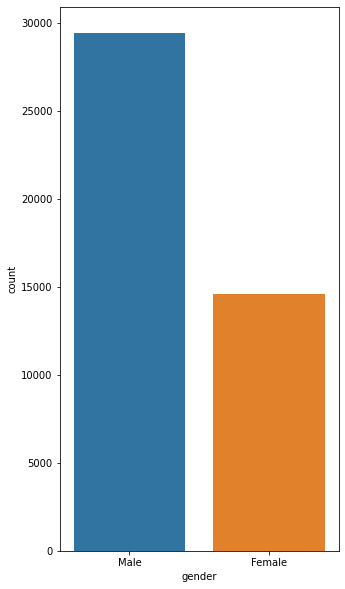

In [8]:
plt.figure(figsize=(5,10))
sns.countplot(data = df, x = df['gender'])

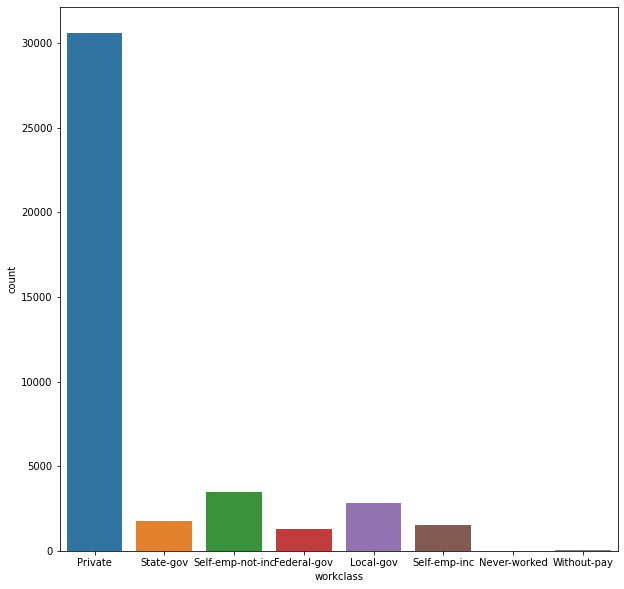

In [9]:
plt.figure(figsize=(10,10))
sns.countplot(data = df, x = df['workclass'])

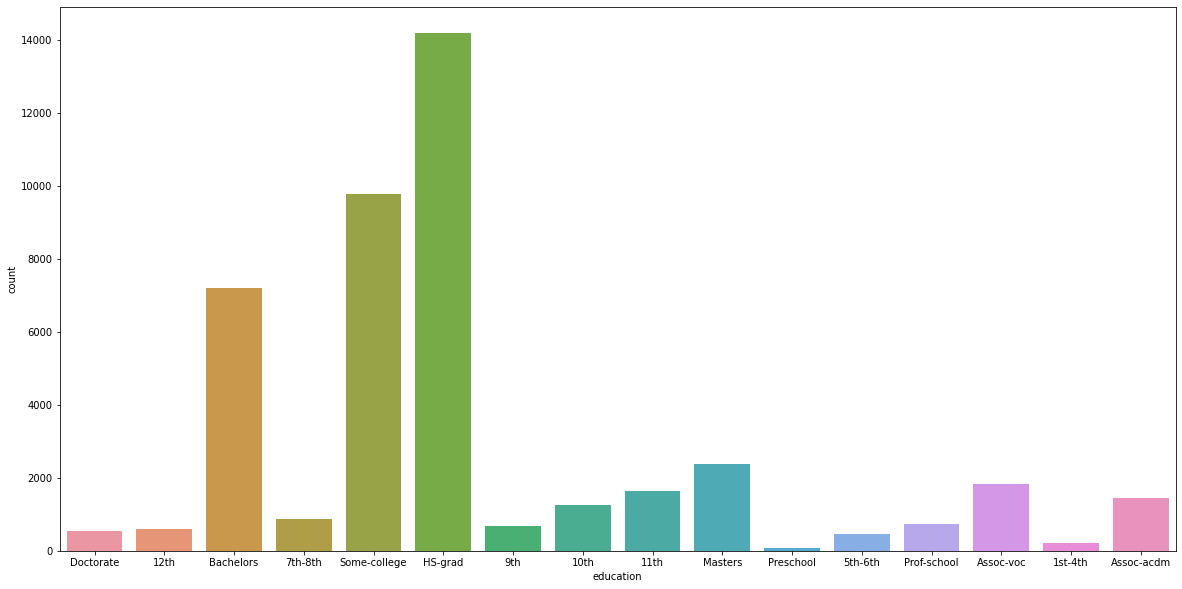

In [10]:
plt.figure(figsize=(20,10))
sns.countplot(data = df, x = df['education'])

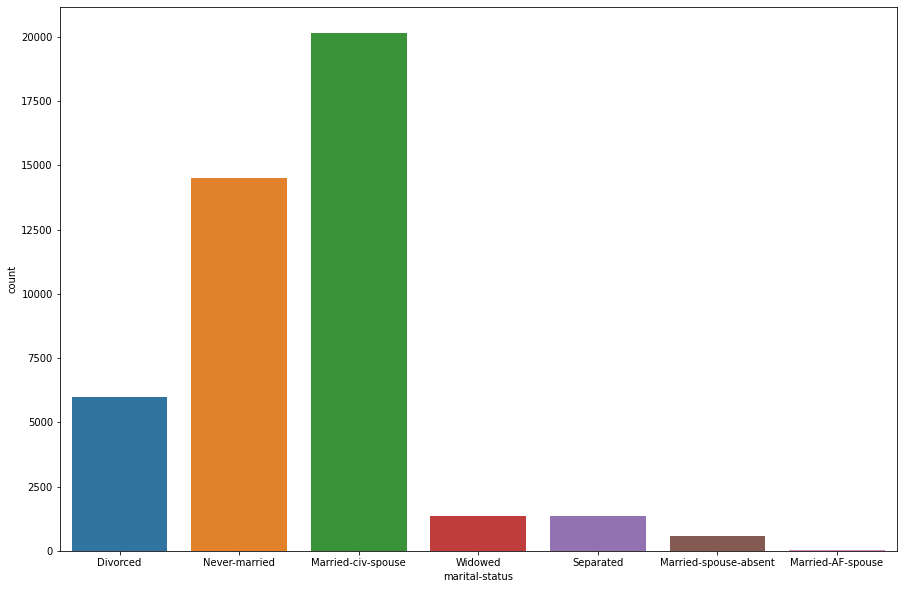

In [11]:
plt.figure(figsize=(15,10))
sns.countplot(data = df, x = df['marital-status'])

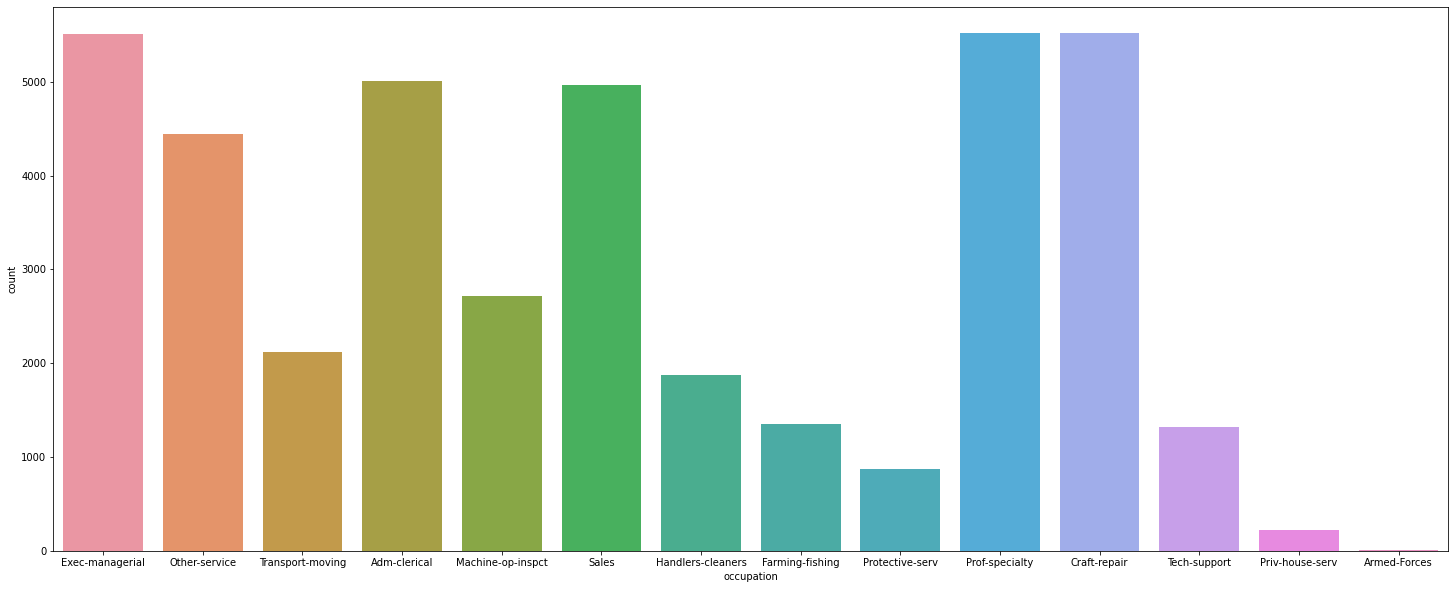

In [12]:
plt.figure(figsize=(25,10))
sns.countplot(data = df, x = df['occupation'])

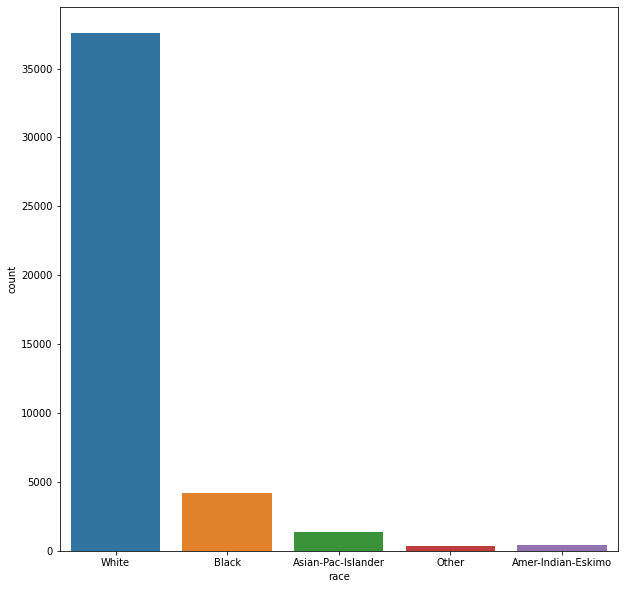

In [13]:
plt.figure(figsize=(10,10))
sns.countplot(data = df, x = df['race'])

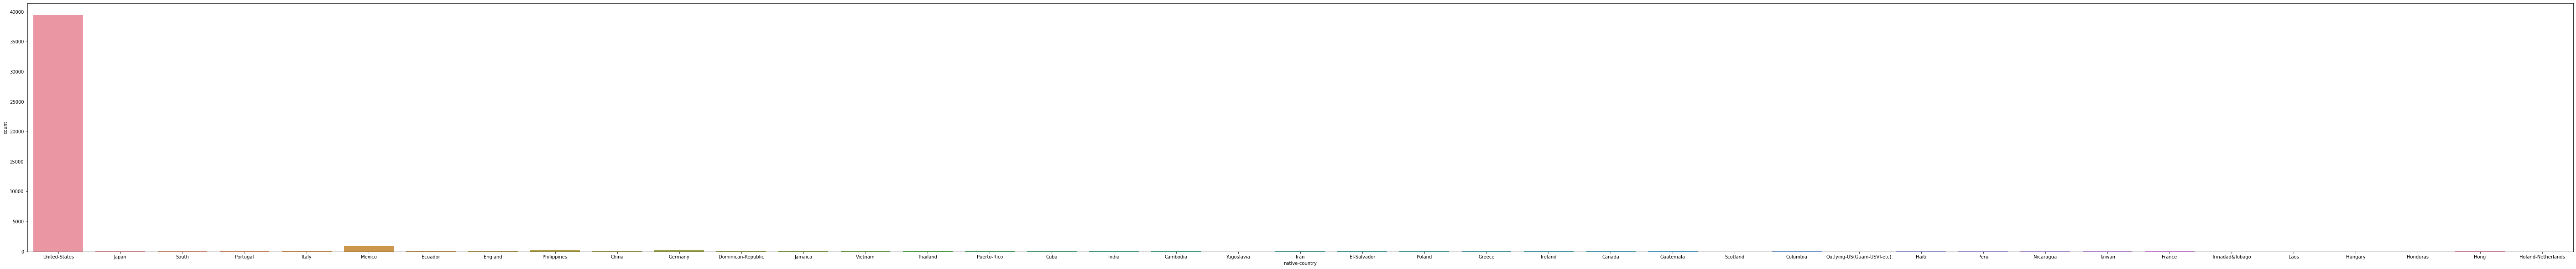

In [14]:
plt.figure(figsize=(100,10))
sns.countplot(data = df, x = df['native-country'])

native-country seems to show the most extreme case. I may have to get rid of / clean this if the results seem to be influenced.

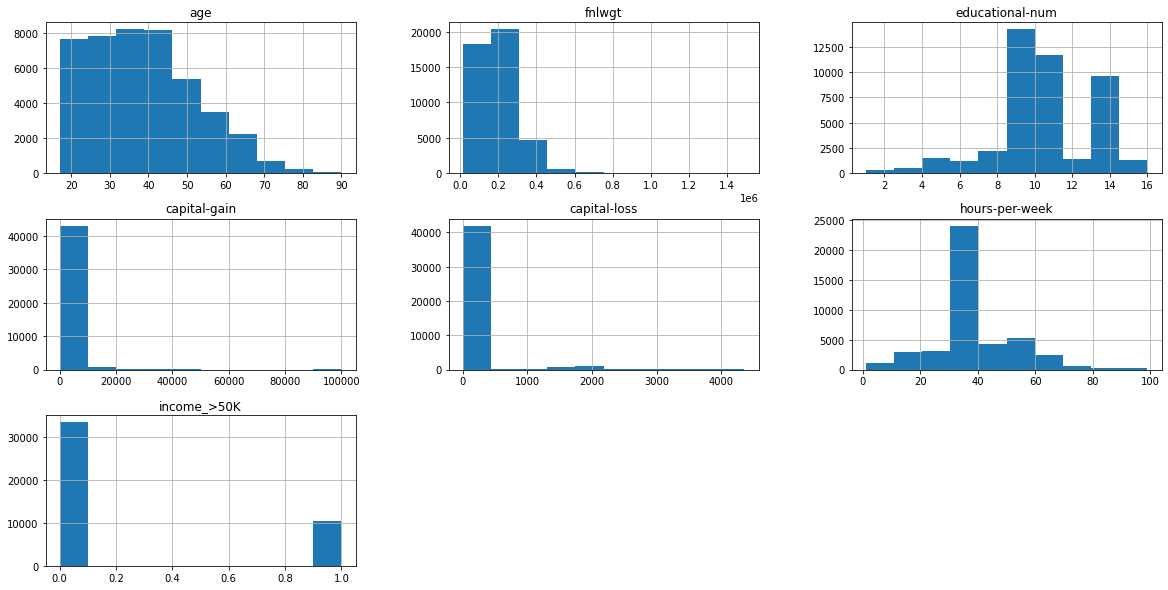

In [15]:
pd.plotting.hist_frame(data=df, figsize=(20,10));

To simplify the data analysis, I'll convert the values of gender with 0 and 1. 

In [16]:
df.gender.replace({'Male': 0,'Female': 1}, inplace=True)
test_df.gender.replace({'Male': 0,'Female': 1}, inplace=True)
df

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income_>50K
0,67,Private,366425,Doctorate,16,Divorced,Exec-managerial,White,0,99999,0,60,United-States,1
1,17,Private,244602,12th,8,Never-married,Other-service,White,0,0,0,15,United-States,0
2,31,Private,174201,Bachelors,13,Married-civ-spouse,Exec-managerial,White,0,0,0,40,United-States,1
3,58,State-gov,110199,7th-8th,4,Married-civ-spouse,Transport-moving,White,0,0,0,40,United-States,0
4,25,State-gov,149248,Some-college,10,Never-married,Other-service,Black,0,0,0,40,United-States,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43952,52,Private,68982,Bachelors,13,Married-civ-spouse,Exec-managerial,White,0,0,0,50,United-States,1
43953,19,Private,116562,HS-grad,9,Never-married,Other-service,White,1,0,0,40,United-States,0
43954,30,Private,197947,Some-college,10,Divorced,Sales,White,0,0,0,58,United-States,0
43955,46,Private,97883,Bachelors,13,Never-married,Sales,White,1,0,0,35,United-States,0


In [17]:
test_df

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,race,gender,capital-gain,capital-loss,hours-per-week,native-country
0,39,Self-emp-not-inc,327120,HS-grad,9,Married-civ-spouse,Craft-repair,White,0,0,0,40,Portugal
1,32,Private,123253,Assoc-acdm,12,Married-civ-spouse,Craft-repair,White,0,0,0,42,United-States
2,47,Private,232628,HS-grad,9,Married-civ-spouse,Craft-repair,Black,0,0,0,40,United-States
3,19,Private,374262,12th,8,Never-married,Handlers-cleaners,White,0,0,0,20,United-States
4,46,Self-emp-not-inc,311231,HS-grad,9,Married-civ-spouse,Farming-fishing,White,0,0,0,40,United-States
...,...,...,...,...,...,...,...,...,...,...,...,...,...
894,27,Private,302406,Masters,14,Married-civ-spouse,Prof-specialty,White,0,0,0,55,United-States
895,17,Private,218124,11th,7,Never-married,Sales,White,1,0,0,20,United-States
896,24,Private,127139,Some-college,10,Never-married,Adm-clerical,White,1,0,0,40,United-States
897,35,Private,132879,Some-college,10,Married-civ-spouse,Tech-support,White,0,0,0,40,United-States


as the meaning of fnlwgt remained unknown, I am dropping it on the train data along with native-country (which is too unbalanced with categories that doesn't even exist in the test data), and income_>50k (which doesn't exist at all in the test data). Getting rid of the income data would also make the columns identical. Education and educational-num is also redundant.

In [18]:
df = df.drop(['fnlwgt', 'native-country', 'income_>50K', 'educational-num'], axis=1)
test_df = test_df.drop(['fnlwgt', 'native-country', 'educational-num'], axis=1)

In [19]:
print(df)
print(test_df)

       age  workclass     education  ... capital-gain capital-loss hours-per-week
0       67    Private     Doctorate  ...        99999            0             60
1       17    Private          12th  ...            0            0             15
2       31    Private     Bachelors  ...            0            0             40
3       58  State-gov       7th-8th  ...            0            0             40
4       25  State-gov  Some-college  ...            0            0             40
...    ...        ...           ...  ...          ...          ...            ...
43952   52    Private     Bachelors  ...            0            0             50
43953   19    Private       HS-grad  ...            0            0             40
43954   30    Private  Some-college  ...            0            0             58
43955   46    Private     Bachelors  ...            0            0             35
43956   30    Private       HS-grad  ...            0            0             40

[43957 rows x 1

In [20]:
# look for missing values
def detailed_isnull(df):
    missing = df.isnull().sum().reset_index()
    missing = missing.rename(columns={'index':'columns',0:'total missing'})
    missing['ratio of missing'] = missing['total missing']/len(df)
    return missing
print(detailed_isnull(df))
print(detailed_isnull(test_df))

          columns  total missing  ratio of missing
0             age              0          0.000000
1       workclass           2498          0.056828
2       education              0          0.000000
3  marital-status              0          0.000000
4      occupation           2506          0.057010
5            race              0          0.000000
6          gender              0          0.000000
7    capital-gain              0          0.000000
8    capital-loss              0          0.000000
9  hours-per-week              0          0.000000
          columns  total missing  ratio of missing
0             age              0               0.0
1       workclass              0               0.0
2       education              0               0.0
3  marital-status              0               0.0
4      occupation              0               0.0
5            race              0               0.0
6          gender              0               0.0
7    capital-gain              

Considering how low the number/percentage of missing values are, we could drop them. Testdata has no missing values at all.

In [21]:
df.dropna(inplace=True,axis=0)

In [22]:
detailed_isnull(df)

,columns,total missing,ratio of missing
0,age,0,0.0
1,workclass,0,0.0
2,education,0,0.0
3,marital-status,0,0.0
4,occupation,0,0.0
5,race,0,0.0
6,gender,0,0.0
7,capital-gain,0,0.0
8,capital-loss,0,0.0
9,hours-per-week,0,0.0


Turn the values that are categorical to numerical.

In [23]:
df.info()
# Pick the ones with Dtype object. Those will be the columns

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41451 entries, 0 to 43956
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             41451 non-null  int64 
 1   workclass       41451 non-null  object
 2   education       41451 non-null  object
 3   marital-status  41451 non-null  object
 4   occupation      41451 non-null  object
 5   race            41451 non-null  object
 6   gender          41451 non-null  int64 
 7   capital-gain    41451 non-null  int64 
 8   capital-loss    41451 non-null  int64 
 9   hours-per-week  41451 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 3.5+ MB


In [24]:
obj_columns = ['workclass','education','marital-status','occupation','race']
new_df = pd.get_dummies(df, columns = obj_columns) #dummies does the conversion to numeric values
new_test_df = pd.get_dummies(test_df, columns = obj_columns)

In [25]:
new_test_df

,age,gender,capital-gain,capital-loss,hours-per-week,workclass_Federal-gov,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,education_10th,education_11th,education_12th,education_1st-4th,education_5th-6th,education_7th-8th,education_9th,education_Assoc-acdm,education_Assoc-voc,education_Bachelors,education_Doctorate,education_HS-grad,education_Masters,education_Preschool,education_Prof-school,education_Some-college,marital-status_Divorced,marital-status_Married-AF-spouse,marital-status_Married-civ-spouse,marital-status_Married-spouse-absent,marital-status_Never-married,marital-status_Separated,marital-status_Widowed,occupation_Adm-clerical,occupation_Armed-Forces,occupation_Craft-repair,occupation_Exec-managerial,occupation_Farming-fishing,occupation_Handlers-cleaners,occupation_Machine-op-inspct,occupation_Other-service,occupation_Priv-house-serv,occupation_Prof-specialty,occupation_Protective-serv,occupation_Sales,occupation_Tech-support,occupation_Transport-moving,race_Amer-Indian-Eskimo,race_Asian-Pac-Islander,race_Black,race_Other,race_White
0,39,0,0,0,40,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,32,0,0,0,42,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,47,0,0,0,40,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,19,0,0,0,20,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
4,46,0,0,0,40,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
894,27,0,0,0,55,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
895,17,1,0,0,20,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
896,24,1,0,0,40,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
897,35,0,0,0,40,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1


In [26]:
new_df = new_df.drop(['workclass_Without-pay'], axis=1)
new_df

,age,gender,capital-gain,capital-loss,hours-per-week,workclass_Federal-gov,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,education_10th,education_11th,education_12th,education_1st-4th,education_5th-6th,education_7th-8th,education_9th,education_Assoc-acdm,education_Assoc-voc,education_Bachelors,education_Doctorate,education_HS-grad,education_Masters,education_Preschool,education_Prof-school,education_Some-college,marital-status_Divorced,marital-status_Married-AF-spouse,marital-status_Married-civ-spouse,marital-status_Married-spouse-absent,marital-status_Never-married,marital-status_Separated,marital-status_Widowed,occupation_Adm-clerical,occupation_Armed-Forces,occupation_Craft-repair,occupation_Exec-managerial,occupation_Farming-fishing,occupation_Handlers-cleaners,occupation_Machine-op-inspct,occupation_Other-service,occupation_Priv-house-serv,occupation_Prof-specialty,occupation_Protective-serv,occupation_Sales,occupation_Tech-support,occupation_Transport-moving,race_Amer-Indian-Eskimo,race_Asian-Pac-Islander,race_Black,race_Other,race_White
0,67,0,99999,0,60,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,17,0,0,0,15,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
2,31,0,0,0,40,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,58,0,0,0,40,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
4,25,0,0,0,40,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43952,52,0,0,0,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
43953,19,1,0,0,40,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
43954,30,0,0,0,58,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
43955,46,1,0,0,35,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1


In [27]:
from sklearn import set_config #visualizer
set_config(display='diagram')
from sklearn.pipeline import make_pipeline

Since the data provided has already distinguished test and train data, I am not using train_test_split. Also, the test data lacked the column workclass_Without-pay which is why I dropped it.

In [28]:
# from sklearn.model_selection import train_test_split
X_test = new_test_df.drop(['gender'], axis=1)
y_test = new_test_df.gender
print(X_test.shape, y_test.shape)
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.20, shuffle=True, random_state=42)
X_train = new_df.drop(['gender'], axis=1)
y_train = new_df.gender
X_train.shape, X_test.shape, y_train.shape, y_test.shape
# X_val = new_test_df.drop(['gender', 'fnlwgt'], axis=1)
# y_val = new_test_df.gender
# X_val.shape, y_val.shape

(899, 52) (899,)


((41451, 52), (899, 52), (41451,), (899,))

In [29]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix

In [30]:
scaler = StandardScaler()
clf = SGDClassifier(random_state=42)

In [31]:
from sklearn.compose import make_column_transformer

In [32]:
from sklearn import svm

I will start with Logistic Regression

In [33]:
pipe = make_pipeline(scaler, LogisticRegression(random_state=42))
pipe.fit(X_train, y_train)
logreg_predictions = pipe.predict(X_test)
print(classification_report(y_test, logreg_predictions))

              precision    recall  f1-score   support

           0       0.85      0.84      0.84       606
           1       0.67      0.68      0.68       293

    accuracy                           0.79       899
   macro avg       0.76      0.76      0.76       899
weighted avg       0.79      0.79      0.79       899



Baseline comparison to see if the system actually learned something,

In [34]:
from sklearn.dummy import DummyClassifier
dummy1 = DummyClassifier(strategy="most_frequent")
dummy2 = DummyClassifier(strategy="stratified")


In [35]:
dummy1.fit(X_train, y_train)
dummy1.score(X_train, y_train)

0.6759064920026054

In [36]:
dummy2.fit(X_train, y_train)
dummy2.score(X_train, y_train)

0.558756121685846

The results are better than the baseline

In [37]:
param_grid = [{
    'logisticregression__C': [0.01, 0.1, 1.0, 10, 100, 1000],
    }]

gs = GridSearchCV(pipe, param_grid, cv=10, scoring='f1_macro', n_jobs=-1, verbose=1, refit=True)
gs.fit(X_train, y_train)

Fitting 10 folds for each of 6 candidates, totalling 60 fits


GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('logisticregression',
                                        LogisticRegression(random_state=42))]),
             n_jobs=-1,
             param_grid=[{'logisticregression__C': [0.01, 0.1, 1.0, 10, 100,
                                                    1000]}],
             scoring='f1_macro', verbose=1)

In [38]:
gs.best_score_

0.7640931504077902

In [39]:
predictions = gs.predict(X_test)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.85      0.84      0.84       606
           1       0.67      0.68      0.68       293

    accuracy                           0.79       899
   macro avg       0.76      0.76      0.76       899
weighted avg       0.79      0.79      0.79       899



Next I will try K-NN Classification.

In [42]:
X_test = new_test_df.drop(['gender'], axis=1)
y_test = new_test_df.gender
X_train = new_df.drop(['gender'], axis=1)
y_train = new_df.gender

In [43]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [44]:
from sklearn.neighbors import KNeighborsClassifier

In [45]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

In [46]:
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import plot_confusion_matrix
ac = classification_report(y_test, y_pred)

array([[505, 101],
       [114, 179]])

In [47]:
print(ac)

              precision    recall  f1-score   support

           0       0.82      0.83      0.82       606
           1       0.64      0.61      0.62       293

    accuracy                           0.76       899
   macro avg       0.73      0.72      0.72       899
weighted avg       0.76      0.76      0.76       899



The final classical model will be Support Vector Machine

In [48]:
from sklearn.svm import SVC

In [49]:
svm_pipe = make_pipeline(StandardScaler(), SVC())

In [50]:
X_test = new_test_df.drop(['gender'], axis=1)
y_test = new_test_df.gender
X_train = new_df.drop(['gender'], axis=1)
y_train = new_df.gender
svm_pipe.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()), ('svc', SVC())])

In [51]:
predictions = svm_pipe.predict(X_test)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.85      0.83      0.84       606
           1       0.66      0.70      0.68       293

    accuracy                           0.78       899
   macro avg       0.75      0.76      0.76       899
weighted avg       0.79      0.78      0.78       899



I will now move on to neural methods. I will start by doing binary classification with a shallow model.

In [198]:
import tensorflow as tf
import tensorflow.keras as keras
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# to get reproducible results:
np.random.seed(1234)
tf.random.set_seed(1234)

In [218]:
X_test = new_test_df.drop(['gender'], axis=1)
y_test = new_test_df.gender
X_train = new_df.drop(['gender'], axis=1)
y_train = new_df.gender

In [219]:
from sklearn.model_selection import train_test_split
X_train, X_dev, y_train, y_dev = train_test_split(X_train, y_train, test_size=899, stratify=y_train)

In [206]:
y_train = np.asarray(y_train).astype('float32')
y_dev = np.asarray(y_dev).astype('float32')
y_test = np.asarray(y_test).astype('float32')

print(y_train.shape)
print(y_dev.shape)
print(y_test.shape)

print(X_train.shape)
print(X_dev.shape)
print(X_test.shape)

(40552,)
(899,)
(899,)
(40552, 52)
(899, 52)
(899, 52)


In [207]:
model = keras.models.Sequential()
model.add(keras.layers.Input(shape=(52,)))
model.add(keras.layers.Dense(1, activation='sigmoid'))

In [208]:
sgd = keras.optimizers.SGD(learning_rate=0.01)
model.compile(optimizer=sgd,
              loss='binary_crossentropy',
              metrics=['accuracy'])
num_epochs = 50
history = model.fit(X_train, y_train, epochs=num_epochs,
                    validation_data=(X_dev, y_dev), batch_size=100)

Epoch 1/50
406/406 [==============================] - 1s 2ms/step - loss: 2040.9170 - accuracy: 0.5811 - val_loss: 200.0854 - val_accuracy: 0.4527
Epoch 2/50
406/406 [==============================] - 1s 1ms/step - loss: 1903.9514 - accuracy: 0.5881 - val_loss: 6441.8252 - val_accuracy: 0.6763
Epoch 3/50
406/406 [==============================] - 1s 1ms/step - loss: 1727.9657 - accuracy: 0.5949 - val_loss: 5820.2676 - val_accuracy: 0.6352
Epoch 4/50
406/406 [==============================] - 1s 1ms/step - loss: 1593.0569 - accuracy: 0.6037 - val_loss: 1085.3182 - val_accuracy: 0.6919
Epoch 5/50
406/406 [==============================] - 1s 1ms/step - loss: 1567.9403 - accuracy: 0.6135 - val_loss: 3565.5989 - val_accuracy: 0.6930
Epoch 6/50
406/406 [==============================] - 1s 1ms/step - loss: 1659.2085 - accuracy: 0.6152 - val_loss: 3869.9280 - val_accuracy: 0.3938
Epoch 7/50
406/406 [==============================] - 1s 1ms/step - loss: 1986.3538 - accuracy: 0.6343 - val_loss

Text(0, 0.5, 'Binary Crossentropy')

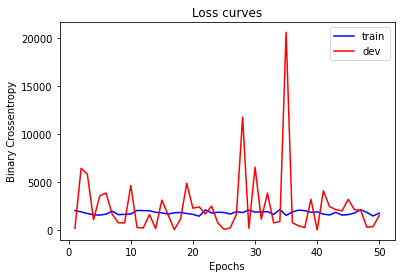

In [209]:
epochs = range(1, num_epochs + 1)
train_loss = history.history['loss']
dev_loss = history.history['val_loss']

plt.plot(epochs, train_loss, 'b', label='train')
plt.plot(epochs, dev_loss, 'r', label='dev')
plt.title('Loss curves')
plt.xlabel('Epochs')
plt.legend()
plt.ylabel('Binary Crossentropy')

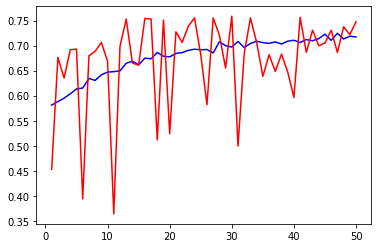

In [210]:
plt.plot(epochs, history.history['accuracy'], 'b', label='train')
plt.plot(epochs, history.history['val_accuracy'], 'r', label='dev')

In [211]:
from sklearn.metrics import classification_report
predictions = [1. if x > 0.5 else 0. for x in model.predict(X_test)]
print(classification_report(predictions, y_test))

              precision    recall  f1-score   support

         0.0       0.69      0.87      0.77       480
         1.0       0.79      0.55      0.65       419

    accuracy                           0.72       899
   macro avg       0.74      0.71      0.71       899
weighted avg       0.74      0.72      0.72       899



As shown, the result is extremely bad. I will try to see if using a hidden layer can ease things up.

This means that I will now move on to Deep Model

In [232]:
import tensorflow as tf
import tensorflow.keras as keras
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# to get reproducible results:
np.random.seed(1234)
tf.random.set_seed(1234)

In [233]:
X_test = new_test_df.drop(['gender'], axis=1)
y_test = new_test_df.gender
X_train = new_df.drop(['gender'], axis=1)
y_train = new_df.gender

In [234]:
from sklearn.model_selection import train_test_split
X_train, X_dev, y_train, y_dev = train_test_split(X_train, y_train, test_size=899, stratify=y_train)

In [235]:
y_train = np.asarray(y_train).astype('float32')
y_dev = np.asarray(y_dev).astype('float32')
y_test = np.asarray(y_test).astype('float32')

print(y_train.shape)
print(y_dev.shape)
print(y_test.shape)

print(X_train.shape)
print(X_dev.shape)
print(X_test.shape)

(40552,)
(899,)
(899,)
(40552, 52)
(899, 52)
(899, 52)


In [236]:
model = keras.models.Sequential()
model.add(keras.layers.Input(shape=(52,)))
model.add(keras.layers.Dense(500, activation='relu', name='dense1'))
model.add(keras.layers.Dense(1, activation='sigmoid', name='dense2'))
model.summary()

Model: "sequential_34"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense1 (Dense)              (None, 500)               26500     
                                                                 
 dense2 (Dense)              (None, 1)                 501       
                                                                 
Total params: 27,001
Trainable params: 27,001
Non-trainable params: 0
_________________________________________________________________


In [237]:
sgd = keras.optimizers.SGD(learning_rate=0.01)
model.compile(optimizer=sgd,
              loss='binary_crossentropy',
              metrics=['accuracy'])
num_epochs = 50
history = model.fit(X_train, y_train, epochs=num_epochs,
                    validation_data=(X_dev, y_dev), batch_size=100)

Epoch 1/50
406/406 [==============================] - 1s 2ms/step - loss: 1113.8302 - accuracy: 0.6656 - val_loss: 0.5999 - val_accuracy: 0.6763
Epoch 2/50
406/406 [==============================] - 1s 2ms/step - loss: 0.6067 - accuracy: 0.6849 - val_loss: 0.5959 - val_accuracy: 0.6774
Epoch 3/50
406/406 [==============================] - 1s 2ms/step - loss: 0.5926 - accuracy: 0.6911 - val_loss: 0.6034 - val_accuracy: 0.6763
Epoch 4/50
406/406 [==============================] - 1s 2ms/step - loss: 0.5886 - accuracy: 0.6993 - val_loss: 0.5955 - val_accuracy: 0.6785
Epoch 5/50
406/406 [==============================] - 1s 2ms/step - loss: 0.5826 - accuracy: 0.7014 - val_loss: 0.6281 - val_accuracy: 0.6785
Epoch 6/50
406/406 [==============================] - 1s 2ms/step - loss: 0.5749 - accuracy: 0.7078 - val_loss: 0.5470 - val_accuracy: 0.6885
Epoch 7/50
406/406 [==============================] - 1s 2ms/step - loss: 0.5711 - accuracy: 0.7118 - val_loss: 0.5440 - val_accuracy: 0.7475
Epo

Text(0, 0.5, 'Binary Crossentropy')

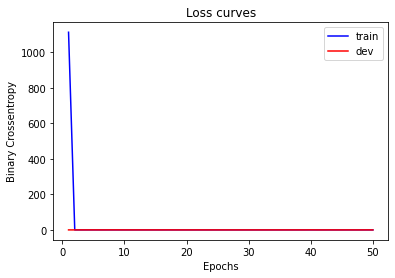

In [238]:
epochs = range(1, num_epochs + 1)
train_loss = history.history['loss']
dev_loss = history.history['val_loss']

plt.plot(epochs, train_loss, 'b', label='train')
plt.plot(epochs, dev_loss, 'r', label='dev')
plt.title('Loss curves')
plt.xlabel('Epochs')
plt.legend()
plt.ylabel('Binary Crossentropy')

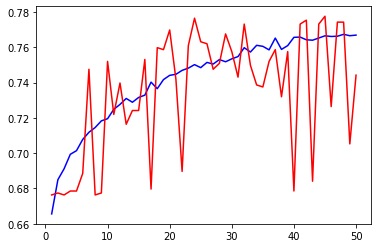

In [239]:
plt.plot(epochs, history.history['accuracy'], 'b', label='train')
plt.plot(epochs, history.history['val_accuracy'], 'r', label='dev')

In [240]:
from sklearn.metrics import classification_report
predictions = [1. if x > 0.5 else 0. for x in model.predict(X_test)]
print(classification_report(predictions, y_test))

              precision    recall  f1-score   support

         0.0       0.94      0.73      0.83       778
         1.0       0.29      0.71      0.42       121

    accuracy                           0.73       899
   macro avg       0.62      0.72      0.62       899
weighted avg       0.85      0.73      0.77       899



I will try to use 1d convolutions network

In [258]:
import tensorflow as tf
import tensorflow.keras as keras
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# to get reproducible results:
np.random.seed(1234)
tf.random.set_seed(1234)

In [259]:
!pip install pydub

In [260]:
from keras.layers import *
model = keras.models.Sequential()
model.add(keras.layers.Input(shape=(52, 1)))

In [261]:
X_test = new_test_df.drop(['gender'], axis=1)
y_test = new_test_df.gender
X_train = new_df.drop(['gender'], axis=1)
y_train = new_df.gender

In [262]:
X_train = np.float32(X_train)
y_train = np.float32(y_train)
X_test = np.float32(X_test)
y_test = np.float32(y_test)

In [263]:
from sklearn.model_selection import train_test_split
X_train, X_dev, y_train, y_dev = train_test_split(X_train, y_train, test_size=899, stratify=y_train)

I was unable to go deeper due to the relative size of the data. The shallow network below however does seem to result to a good result

In [264]:
# # block 1
model.add(Conv1D(16, 3, activation='relu'))
model.add(Conv1D(32, 3, activation='relu'))
model.add(MaxPool1D(pool_size=2, strides=2))

# block 2
model.add(Conv1D(64, 3, activation='relu'))
model.add(Conv1D(128, 3, activation='relu'))
model.add(MaxPool1D(pool_size=2, strides=2))

# dense part
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [265]:
model.summary()

Model: "sequential_36"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_9 (Conv1D)           (None, 50, 16)            64        
                                                                 
 conv1d_10 (Conv1D)          (None, 48, 32)            1568      
                                                                 
 max_pooling1d_4 (MaxPooling  (None, 24, 32)           0         
 1D)                                                             
                                                                 
 conv1d_11 (Conv1D)          (None, 22, 64)            6208      
                                                                 
 conv1d_12 (Conv1D)          (None, 20, 128)           24704     
                                                                 
 max_pooling1d_5 (MaxPooling  (None, 10, 128)          0         
 1D)                                                 

In [266]:
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [267]:
es = keras.callbacks.EarlyStopping(monitor='val_loss', verbose=1, patience=10)
history = model.fit(X_train, y_train, epochs=100,
                    validation_data=(X_dev, y_dev),
                    callbacks=[es])

Epoch 1/100
1268/1268 [==============================] - 19s 15ms/step - loss: 0.6385 - accuracy: 0.7691 - val_loss: 0.4279 - val_accuracy: 0.7987
Epoch 2/100
1268/1268 [==============================] - 18s 14ms/step - loss: 0.4348 - accuracy: 0.7890 - val_loss: 0.4274 - val_accuracy: 0.7764
Epoch 3/100
1268/1268 [==============================] - 18s 14ms/step - loss: 0.4536 - accuracy: 0.7895 - val_loss: 0.4146 - val_accuracy: 0.8076
Epoch 4/100
1268/1268 [==============================] - 18s 14ms/step - loss: 0.4269 - accuracy: 0.7937 - val_loss: 0.4164 - val_accuracy: 0.7931
Epoch 5/100
1268/1268 [==============================] - 18s 14ms/step - loss: 0.4228 - accuracy: 0.7969 - val_loss: 0.4291 - val_accuracy: 0.7898
Epoch 6/100
1268/1268 [==============================] - 18s 14ms/step - loss: 0.4228 - accuracy: 0.7955 - val_loss: 0.4046 - val_accuracy: 0.7964
Epoch 7/100
1268/1268 [==============================] - 18s 14ms/step - loss: 0.4233 - accuracy: 0.7979 - val_loss: 0

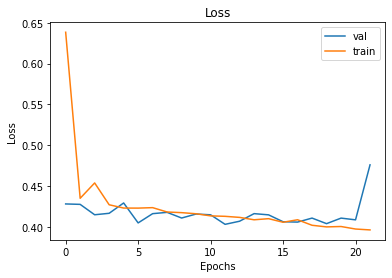

In [272]:
plt.plot(history.history['val_loss'],  label='val')
plt.plot(history.history['loss'], label='train')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

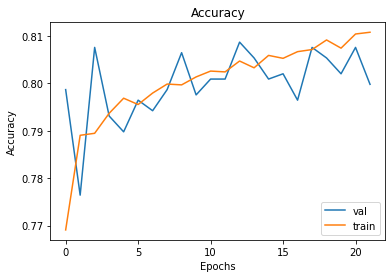

In [273]:
plt.plot(history.history['val_accuracy'],  label='val')
plt.plot(history.history['accuracy'], label='train')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [274]:
prediction = from_binary(model.predict(X_test))
print("Accuracy: ",  accuracy_score(y_test, prediction))

Accuracy:  0.6740823136818688


In [275]:
from sklearn.metrics import classification_report
predictions = [1. if x > 0.5 else 0. for x in model.predict(X_test)]
print(classification_report(predictions, y_test))

              precision    recall  f1-score   support

         0.0       0.86      0.83      0.84       627
         1.0       0.63      0.68      0.66       272

    accuracy                           0.79       899
   macro avg       0.75      0.76      0.75       899
weighted avg       0.79      0.79      0.79       899

